Number of vehicles                                =   500
Total length of vehicles                          =   249877 cm
Number of lanes                                   =   85
Capacity per lane                                 =   3000 cm
List of all vehicle lengths (in order of arrival) =   [363, 558, 355, 497, 1845, 406, 421, 466, 369, 443, 359, 421, 440, 1724, 596, 429, 590, 428, 391, 590, 440, 576, 438, 572, 394, 531, 385, 356, 410, 482, 576, 350, 487, 461, 500, 589, 423, 508, 416, 495, 564, 446, 407, 432, 432, 425, 403, 541, 437, 528, 430, 539, 378, 437, 381, 433, 437, 541, 444, 448, 408, 432, 370, 436, 493, 406, 427, 434, 557, 476, 407, 410, 389, 433, 553, 576, 454, 547, 438, 560, 470, 487, 422, 475, 366, 479, 435, 422, 536, 399, 876, 430, 454, 400, 440, 368, 377, 479, 375, 422, 413, 356, 403, 400, 450, 513, 400, 410, 549, 406, 1865, 895, 428, 408, 433, 558, 431, 588, 416, 480, 596, 351, 579, 1098, 445, 444, 1327, 551, 430, 402, 441, 477, 585, 437, 429, 486, 403, 390, 450, 433,


Solution
--------
Lane 0 = [495, 408, 358, 379, 718, 361] (used 2719 of 3000 cm)
Lane 1 = [371, 415, 450, 351, 497, 372, 368] (used 2824 of 3000 cm)
Lane 2 = [487, 497, 598, 436, 490, 439] (used 2947 of 3000 cm)
Lane 3 = [394, 456, 1406, 435] (used 2691 of 3000 cm)
Lane 4 = [596, 435, 410, 445, 359, 458] (used 2703 of 3000 cm)
Lane 5 = [579, 477, 429, 481, 414, 406] (used 2786 of 3000 cm)
Lane 6 = [421, 576, 437, 1260] (used 2694 of 3000 cm)
Lane 7 = [436, 423, 463, 585, 466, 383] (used 2756 of 3000 cm)
Lane 8 = [429, 432, 485, 498, 353, 417] (used 2614 of 3000 cm)
Lane 9 = [558, 441, 360, 375, 401, 449, 416] (used 3000 of 3000 cm)
Lane 10 = [387, 1920, 465] (used 2772 of 3000 cm)
Lane 11 = [437, 469, 431, 591, 406, 406] (used 2740 of 3000 cm)
Lane 12 = [421, 508, 444, 588, 416, 360] (used 2737 of 3000 cm)
Lane 13 = [433, 370, 445, 391, 387, 398, 435] (used 2859 of 3000 cm)
Lane 14 = [376, 377, 485, 412, 425, 419, 472] (used 2966 of 3000 cm)
Lane 15 = [466, 576, 407, 433, 560, 448] (u

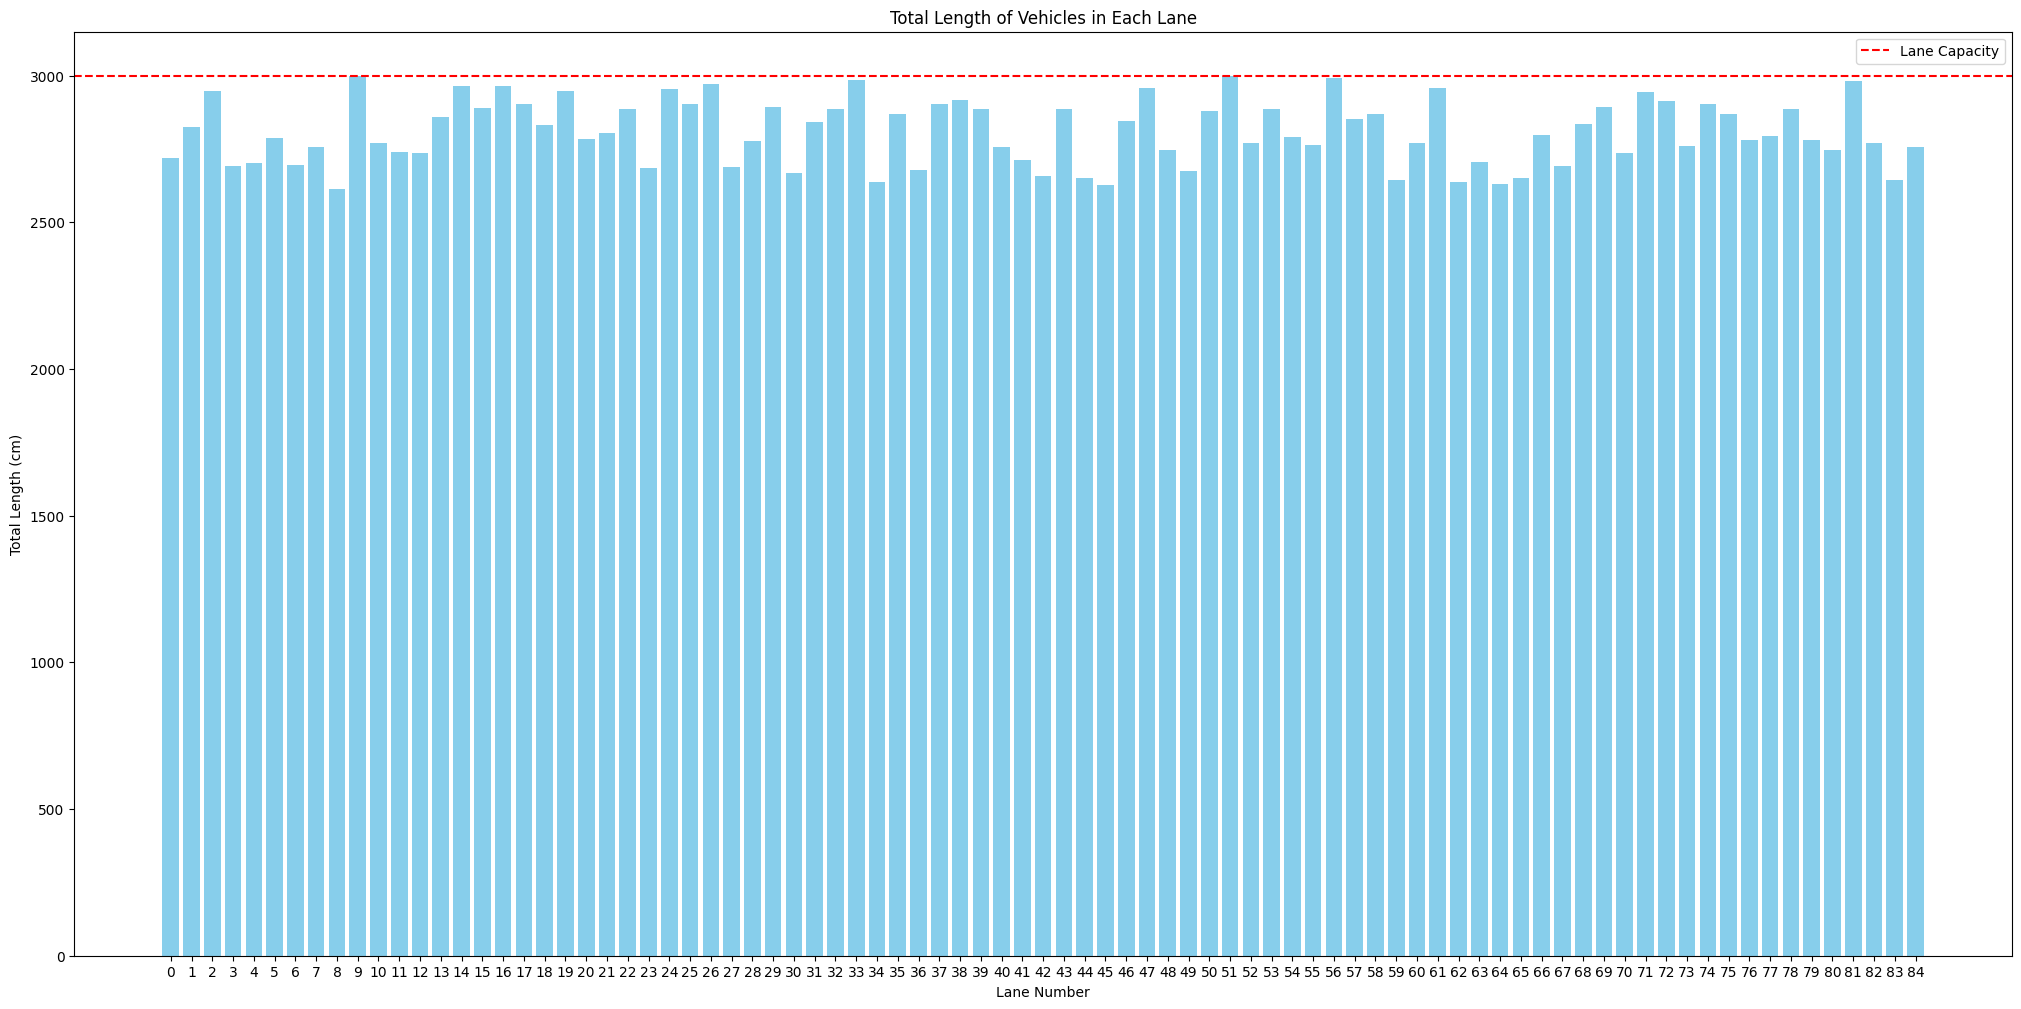

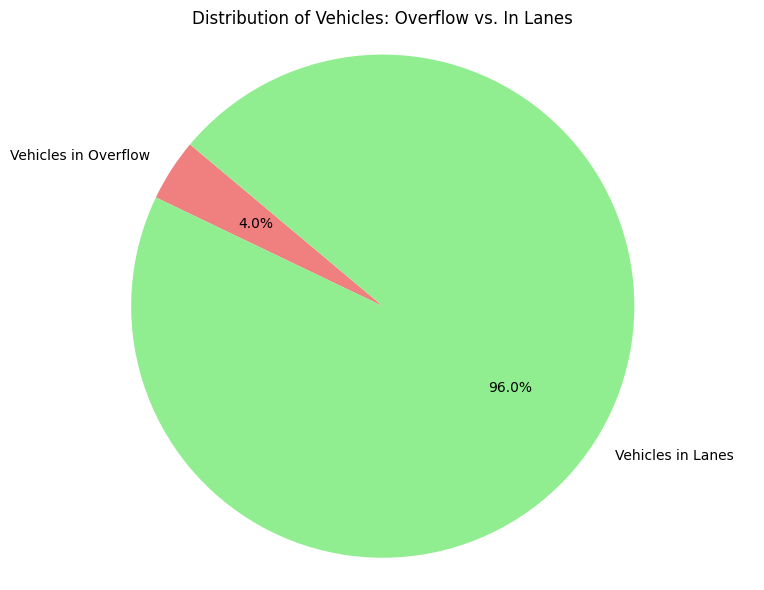

In [ ]:
import random
import matplotlib.pyplot as plt

def printSol(S, c, O):
    #PRINTS OUTPUT ON THE SCREEN
    print("\nSolution\n--------")
    for i in range(len(S)):
        print("Lane",  i, "=", S[i], "(used", sum(S[i]), "of", c, "cm)")
    print("Overflow =", O)
    print("Total length in overflow =", sum(O), "cm")

    # Visualization
    plotLaneUsage(S, c, O)

def plotLaneUsage(S, c, O):
    # Create a bar chart for lane usage
    lane_lengths = [sum(lane) for lane in S]
    lane_indices = list(range(len(S)))

    plt.figure(figsize=(55, 12))

    # Bar chart for lane usage
    plt.subplot(1, 2, 1)
    plt.bar(lane_indices, lane_lengths, color='skyblue')
    plt.axhline(y=c, color='r', linestyle='--', label='Lane Capacity')
    plt.title('Total Length of Vehicles in Each Lane')
    plt.xlabel('Lane Number')
    plt.ylabel('Total Length (cm)')
    plt.xticks(lane_indices)
    plt.legend()

    # # Pie chart for overflow
    # Calculate the total number of vehicles
    total_vehicles = len(L)

    # Calculate the number of vehicles in lanes
    vehicles_in_lanes = sum(len(lane) for lane in S)

    # Calculate the number of vehicles in overflow
    vehicles_in_overflow = total_vehicles - vehicles_in_lanes

    # Prepare data for the pie chart
    labels = ['Vehicles in Overflow', 'Vehicles in Lanes']
    sizes = [vehicles_in_overflow, vehicles_in_lanes]
    colors = ['lightcoral', 'lightgreen']

    # Create the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title('Distribution of Vehicles: Overflow vs. In Lanes')

    plt.tight_layout()
    plt.show()


def getLane(ch,carLen, S, L):
    if(ch==1):
        lane = getFirstLane(carLen, S, L)
    elif(ch==2):
        lane = getEmptyLane(carLen, S, L)
    elif(ch==3):
        # ASSIGNS THE VEHICLES TO EMPTY LANE FIRST
        lane = getEmptyLane(carLen, S, c)
        if lane == -1:  # IF THERE IS NO EMPTY LANE AVAILABLE, CHECKS FOR THE FULLEST LANE (i.e., checks for the lengthy vehicle)
            lane = getFullLane(carLen, S, c)
    elif(ch==4):
        lane = getRandomLane(carLen, S, L)
    return lane
        

def getFirstLane(carLen, S, L):
    # pushes the vehicles in the lane in the order of arrival
    for i in range(len(S)):
        if sum(S[i]) + carLen <= c:
            return i
    return  -1

def getEmptyLane(carLen, S, L):
    # pushes the vehicle in the empty lane only
    empty_lanes = []
    for i in range(len(S)):
        if sum(S[i]) + carLen <= c and len(S[i]) == 0:
            empty_lanes.append(i)
    if len(empty_lanes) == 0:
        return -1
    else:
        return min(empty_lanes, key=lambda x: sum(S[x]))

def getFullLane(carLen, S, c):
# List of lanes that have at least one vehicle and can accommodate the incoming vehicle
    full_lanes = [i for i in range(len(S)) if sum(S[i]) + carLen <= c and len(S[i]) > 0]

    if not full_lanes:
        # If there are no suitable full lanes, return -1
        return -1

    # pushes the vehicle into the fullest lane (with the maximum total length of vehicles)
    max_lane = max(full_lanes, key=lambda x: sum(S[x]))
    return max_lane

def getRandomLane(carLen, S, L):
    # pushes the vehicles randomly into the lane
    candidate_lanes = []
    for i in range(len(S)):
        if sum(S[i]) + carLen <= c:
            candidate_lanes.append(i)
    if len(candidate_lanes) == 0:
        return -1
    else:
        return random.choice(candidate_lanes)
    

            
    
   
# Main Program -------------------------------------------------------------
# reads the input text file | appends the lengths of vehicles into the list L
L = []
with open("input.txt","r") as f:
    c = int(f.readline())
    numLanes = int(f.readline())
    for line in f:
        L.append(int(line))

#output the information to the user during the run
print("Number of vehicles                                =  ", len(L))
print("Total length of vehicles                          =  ", sum(L), "cm")
print("Number of lanes                                   =  ", numLanes)
print("Capacity per lane                                 =  ", c, "cm")
print("List of all vehicle lengths (in order of arrival) =  ", L)

print("MENU:")
print("First suitable lane      -   Enter 1")
print("Empty suitable lane      -   Enter 2")
print("Full suitable lane       -   Enter 3")
print("Random suitable lane     -   Enter 4")

ch = int(input("Enter your choice : "))

# storing the vehicles in each lane and the overflow
S = [[] for i in range(numLanes)]
O = []

for i in range(len(L)):
    carLen = L[i]
    lane = getLane(ch,carLen,S,L)
    if lane != -1:
        S[lane].append(carLen)
    else:
        O.append(carLen)

# Print details of the solution to the screen
printSol(S, c, O)


